In [28]:
!pip install biopython

     |████████████████████████████████| 2.3 MB 1.2 MB/s eta 0:00:01


# Initial Try with default data

In [13]:
import nxviz as nv

In [12]:
# Draws circular plot of the network
import matplotlib.pyplot as plt
import networkx as nx

In [5]:
G = nx.karate_club_graph() # data can be read from specified stored social graph in networkx library.
print("Node Degree")
for v in G:
    print (v, G.degree(v))

Node Degree
0 16
1 9
2 10
3 6
4 3
5 4
6 4
7 4
8 5
9 2
10 3
11 1
12 2
13 5
14 2
15 2
16 2
17 2
18 2
19 3
20 2
21 2
22 2
23 5
24 3
25 3
26 2
27 4
28 3
29 4
30 4
31 6
32 12
33 17


In [24]:
G.nodes[0]

{'club': 'Mr. Hi'}

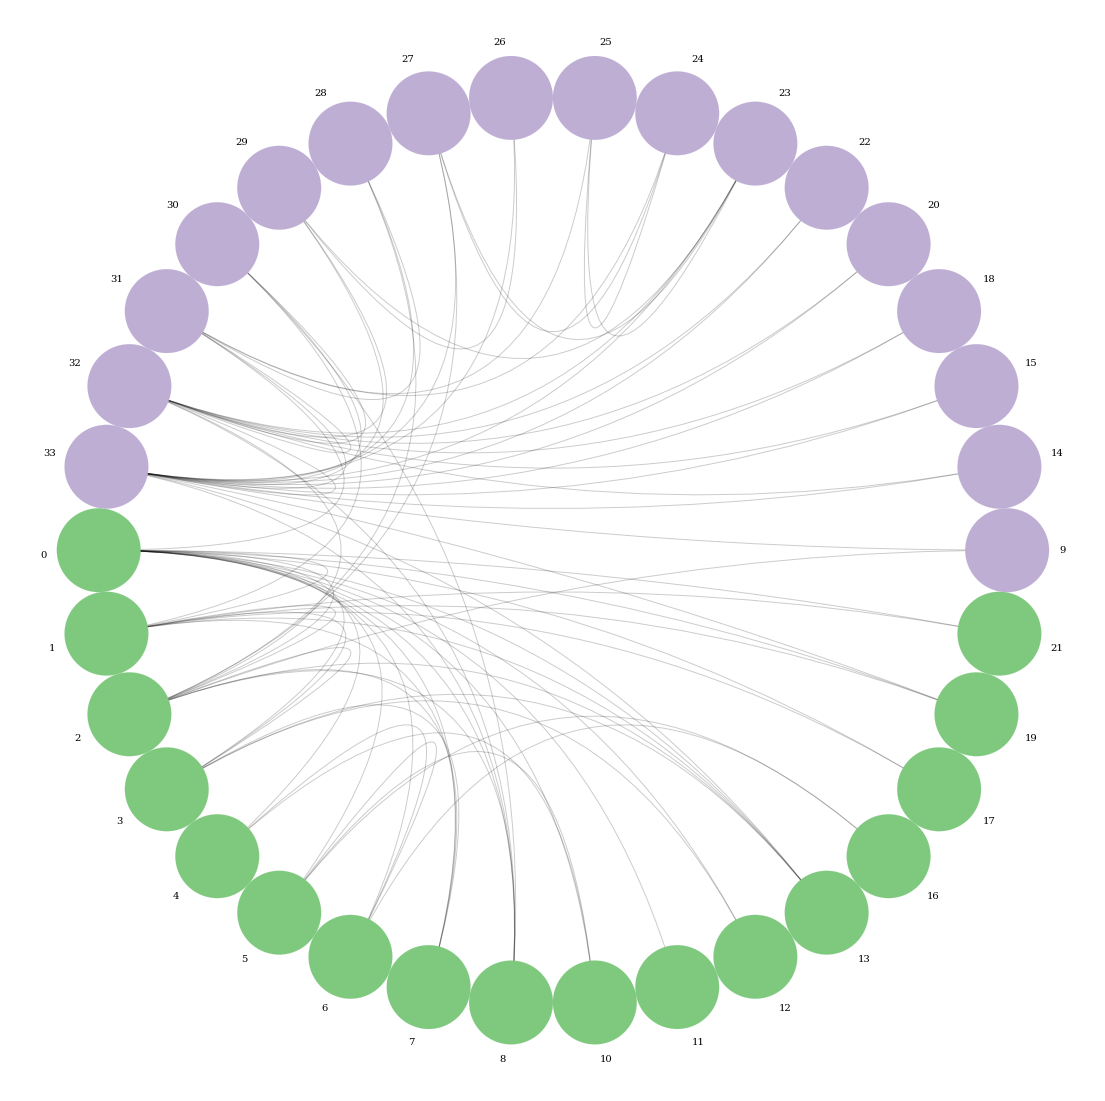

In [27]:
c = nv.CircosPlot(
    G,
    dpi=600,
    node_grouping="club",
    #edge_width="nodes",
    figsize=(20, 20),
    node_color="club",
    node_labels=True,
)
c.draw()
plt.show()

#nv.annotate.circos_group(G, group_by="group")

# second try with author data from elsewhere

In [1]:
from Bio import Entrez
from Bio import Medline
from tqdm import tqdm

In [2]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from itertools import combinations

In [33]:
# Change this email to your email address
Entrez.email = "pelonomi.moiloa@gmail.com"

keyword = "optical trap"

result = Entrez.read(Entrez.esearch(db="pubmed", retmax=10, term=keyword))
print(
    "Total number of publications that contain the term {}: {}".format(
        keyword, result["Count"]
    )
)

# Fetch all ids
MAX_COUNT = result["Count"]
result = Entrez.read(
    Entrez.esearch(db="pubmed", retmax=result["Count"], term=keyword)
)

ids = result["IdList"]

batch_size = 100
batches = [ids[x: x + 100] for x in range(0, len(ids), batch_size)]

record_list = []
for batch in tqdm(batches):
    h = Entrez.efetch(db="pubmed", id=batch, rettype="medline", retmode="text")
    records = Medline.parse(h)
    record_list.extend(list(records))
print("Complete.")

Total number of publications that contain the term optical trap: 6237


100%|██████████| 63/63 [05:28<00:00,  5.21s/it]

Complete.


In [34]:
record_list

[{'PMID': '34145646',
  'OWN': 'NLM',
  'STAT': 'Publisher',
  'LR': '20210619',
  'IS': '1521-4095 (Electronic) 0935-9648 (Linking)',
  'DP': '2021 Jun 19',
  'TI': 'Multimodal Tuning of Synaptic Plasticity Using Persistent Luminescent Memitters.',
  'PG': 'e2101895',
  'LID': '10.1002/adma.202101895 [doi]',
  'AB': 'Mimicking memory processes, including encoding, storing, and retrieving information, is critical for neuromorphic computing and artificial intelligence. Synaptic behavior simulations through electronic, magnetic, or photonic devices based on metal oxides, 2D materials, molecular complex and phase change materials, represent important strategies for performing computational tasks with enhanced power efficiency. Here, a special class of memristive materials based on persistent luminescent memitters (termed as a portmanteau of "memory" and "emitter") with optical characteristics closely resembling those of biological synapses is reported. The memory process and synaptic plas

Okay so the list fetched is a list of item dictionaries. Similar to ours. Partial difference as that we only seem to be working with authors, not citations or anything like that. Hmm, lets continue

In [37]:
sns.set_style("white")

publication_data = pd.DataFrame(record_list)
publication_data.dropna(subset=['EDAT'], inplace=True)
publication_data["Year"] = (
    publication_data["EDAT"].astype(str).str[0:4].astype(int)
)

plt.figure(figsize=(10, 10), dpi=600)

# Top 10 authors
plt.subplot(2, 2, 1)
authors_flat = [
    author
    for authors in list(publication_data["FAU"].dropna())
    for author in authors
]
top10authors = pd.DataFrame.from_records(
    Counter(authors_flat).most_common(10), columns=["Name", "Count"]
)
sns.barplot(x="Count", y="Name", data=top10authors, palette="RdBu_r")
plt.title("Top 10 Authors")


# Publications over Time
plt.subplot(2, 2, 2)
yearly = pd.DataFrame(publication_data["Year"].value_counts().reset_index())
yearly.columns = ["Year", "Count"]
sns.lineplot(x="Year", y="Count", data=yearly)
plt.title("Publications over Time")
plt.xlim([1986, 2020])


plt.subplot(2, 2, 3)

# TOP 10 Journals
top10journals = pd.DataFrame.from_records(
    Counter(publication_data["TA"]).most_common(10),
    columns=["Journal", "Count"],
)

sns.barplot(x="Count", y="Journal", data=top10journals, palette="RdBu_r")
plt.title("Top 10 Journals")

# Top associated keywords
plt.subplot(2, 2, 4)

flat_kw = [
    _.lower()
    for kws in list(publication_data["OT"].dropna())
    for kw in kws
    for _ in kw.split(" ")
]

top10kw = pd.DataFrame.from_records(
    Counter(flat_kw).most_common(10), columns=["Keyword", "Count"]
)

sns.barplot(x="Count", y="Keyword", data=top10kw, palette="RdBu_r")
plt.title("Top 10 Associated Keywords")
plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.3, wspace=0.3)
plt.show()

In [38]:
publication_data.head()

PMID  OWN                STAT        LR  \
0  34145646  NLM           Publisher  20210619   
1  34143161  NLM           Publisher  20210618   
2  34143035  NLM  PubMed-not-MEDLINE  20210621   
3  34143005  NLM          In-Process  20210621   
4  34123232  NLM  PubMed-not-MEDLINE  20210615   

                                           IS           DP  \
0  1521-4095 (Electronic) 0935-9648 (Linking)  2021 Jun 19   
1  1477-9234 (Electronic) 1477-9226 (Linking)  2021 Jun 18   
2  1539-4522 (Electronic) 1559-128X (Linking)   2021 Jun 1   
3  1539-4522 (Electronic) 1559-128X (Linking)   2021 Jun 1   
4       2041-6520 (Print) 2041-6520 (Linking)  2020 Oct 19   

                                                  TI           PG  \
0  Multimodal Tuning of Synaptic Plasticity Using...     e2101895   
1  Oxygen vacancy mediated room-temperature ferro...          NaN   
2  Optical spanner for nanoparticle rotation with...    4820-4826   
3  Optical design for laser tweezers Raman spectr...    4519-4523   
4  Mechanically tightening, untying and retying a...  12512-12521   

                            LID  \
0  10.1002/adma.202101895 [doi]   
1      10.1039/d1dt00438g [doi]   
2       10.1364/AO.425892 [doi]   
3       10.1364/AO.424595 [doi]   
4      10.1039/d0sc02796k [doi]   

                                                  AB  ...  RPF   GN   PS  FPS  \
0  Mimicking memory processes, including encoding...  ...  NaN  NaN  NaN  NaN   
1  We report on the magnetic and optical properti...  ...  NaN  NaN  NaN  NaN   
2  Based on the focused optical vortex (OV) gener...  ...  NaN  NaN  NaN  NaN   
3  We demonstrate a method to double the collecti...  ...  NaN  NaN  NaN  NaN   
4  Knotted conformation is one of the most surpri...  ...  NaN  NaN  NaN  NaN   

  DRDT CTDT   RF  RPI   GS  Year  
0  NaN  NaN  NaN  NaN  NaN  2021  
1  NaN  NaN  NaN  NaN  NaN  2021  
2  NaN  NaN  NaN  NaN  NaN  2021  
3  NaN  NaN  NaN  NaN  NaN  2021  
4  NaN  NaN  NaN  NaN  NaN  2021  

[5 rows x 74 columns]

In [90]:
# Extract author connections
authors = publication_data["FAU"].dropna()
author_connections = list(
    map(lambda x: list(combinations(x[::-1], 2)), authors)
)
flat_connections = [item for sublist in author_connections for item in sublist]

In [91]:
authors

0       [Bian, Hongyu, Qin, Xian, Wu, Yiming, Yi, Zhig...
1       [Hossain, Rana, Billah, Areef, Ishizaki, Manab...
2       [Shen, Zhe, Xiang, Zhiyuan, Wang, Ziyao, Shen,...
3                   [Dahlberg, Tobias, Andersson, Magnus]
4                                [Wang, Han, Li, Hongbin]
                              ...                        
6232                [Olson, R W, Loring, R F, Fayer, M D]
6233                                       [Baggish, M S]
6234                            [Meyer, O, Schlegel, H G]
6235                            [Seibert, M, Alfano, R R]
6236                                       [Willard, J E]
Name: FAU, Length: 6234, dtype: object

In [92]:
authors[0]

['Bian, Hongyu',
 'Qin, Xian',
 'Wu, Yiming',
 'Yi, Zhigao',
 'Liu, Sirui',
 'Wang, Yu',
 'Brites, Carlos D S',
 'Carlos, Luis D',
 'Liu, Xiaogang']

In [93]:
author_connections

[[('Liu, Xiaogang', 'Carlos, Luis D'),
  ('Liu, Xiaogang', 'Brites, Carlos D S'),
  ('Liu, Xiaogang', 'Wang, Yu'),
  ('Liu, Xiaogang', 'Liu, Sirui'),
  ('Liu, Xiaogang', 'Yi, Zhigao'),
  ('Liu, Xiaogang', 'Wu, Yiming'),
  ('Liu, Xiaogang', 'Qin, Xian'),
  ('Liu, Xiaogang', 'Bian, Hongyu'),
  ('Carlos, Luis D', 'Brites, Carlos D S'),
  ('Carlos, Luis D', 'Wang, Yu'),
  ('Carlos, Luis D', 'Liu, Sirui'),
  ('Carlos, Luis D', 'Yi, Zhigao'),
  ('Carlos, Luis D', 'Wu, Yiming'),
  ('Carlos, Luis D', 'Qin, Xian'),
  ('Carlos, Luis D', 'Bian, Hongyu'),
  ('Brites, Carlos D S', 'Wang, Yu'),
  ('Brites, Carlos D S', 'Liu, Sirui'),
  ('Brites, Carlos D S', 'Yi, Zhigao'),
  ('Brites, Carlos D S', 'Wu, Yiming'),
  ('Brites, Carlos D S', 'Qin, Xian'),
  ('Brites, Carlos D S', 'Bian, Hongyu'),
  ('Wang, Yu', 'Liu, Sirui'),
  ('Wang, Yu', 'Yi, Zhigao'),
  ('Wang, Yu', 'Wu, Yiming'),
  ('Wang, Yu', 'Qin, Xian'),
  ('Wang, Yu', 'Bian, Hongyu'),
  ('Liu, Sirui', 'Yi, Zhigao'),
  ('Liu, Sirui', 'Wu, Yiming

In [94]:
# Create a dataframe with the connections
df = pd.DataFrame(flat_connections, columns=["From", "To"])
df_graph = df.groupby(["From", "To"]).size().reset_index()
df_graph.columns = ["From", "To", "Count"]

In [95]:
df_graph

From                    To  Count
0          A K Williams, Martin       Raudsepp, Allan      1
1                  Aabo, Thomas         Bosanac, Lana      1
2      Aachmann, Finn Lillelund   Gaardlos, Margrethe      1
3      Aachmann, Finn Lillelund  Hati, Armend Gazmeno      1
4      Aachmann, Finn Lillelund       Hjornevik, Maya      1
...                         ...                   ...    ...
78563     von Zanthier, Joachim       Wolf, Sebastian      1
78564       von der Wense, Lars       Bekker, Hendrik      1
78565       von der Wense, Lars    Berengut, Julian C      1
78566       von der Wense, Lars       Bilous, Pavlo V      1
78567       von der Wense, Lars    Seiferle, Benedict      1

[78568 rows x 3 columns]

In [96]:
G = nx.from_pandas_edgelist(
    df_graph, source="From", target="To", edge_attr="Count"
)

# Limit to TOP 50 authors
top50authors = pd.DataFrame.from_records(
    Counter(authors_flat).most_common(50), columns=["Name", "Count"]
)

In [46]:
top50_nodes = (n for n in list(G.nodes()) if n in list(top50authors["Name"]))

G_50 = G.subgraph(top50_nodes)

for n in G_50.nodes():
    G_50.nodes[n]["publications"] = int(
        top50authors[top50authors["Name"] == n]["Count"]
    )

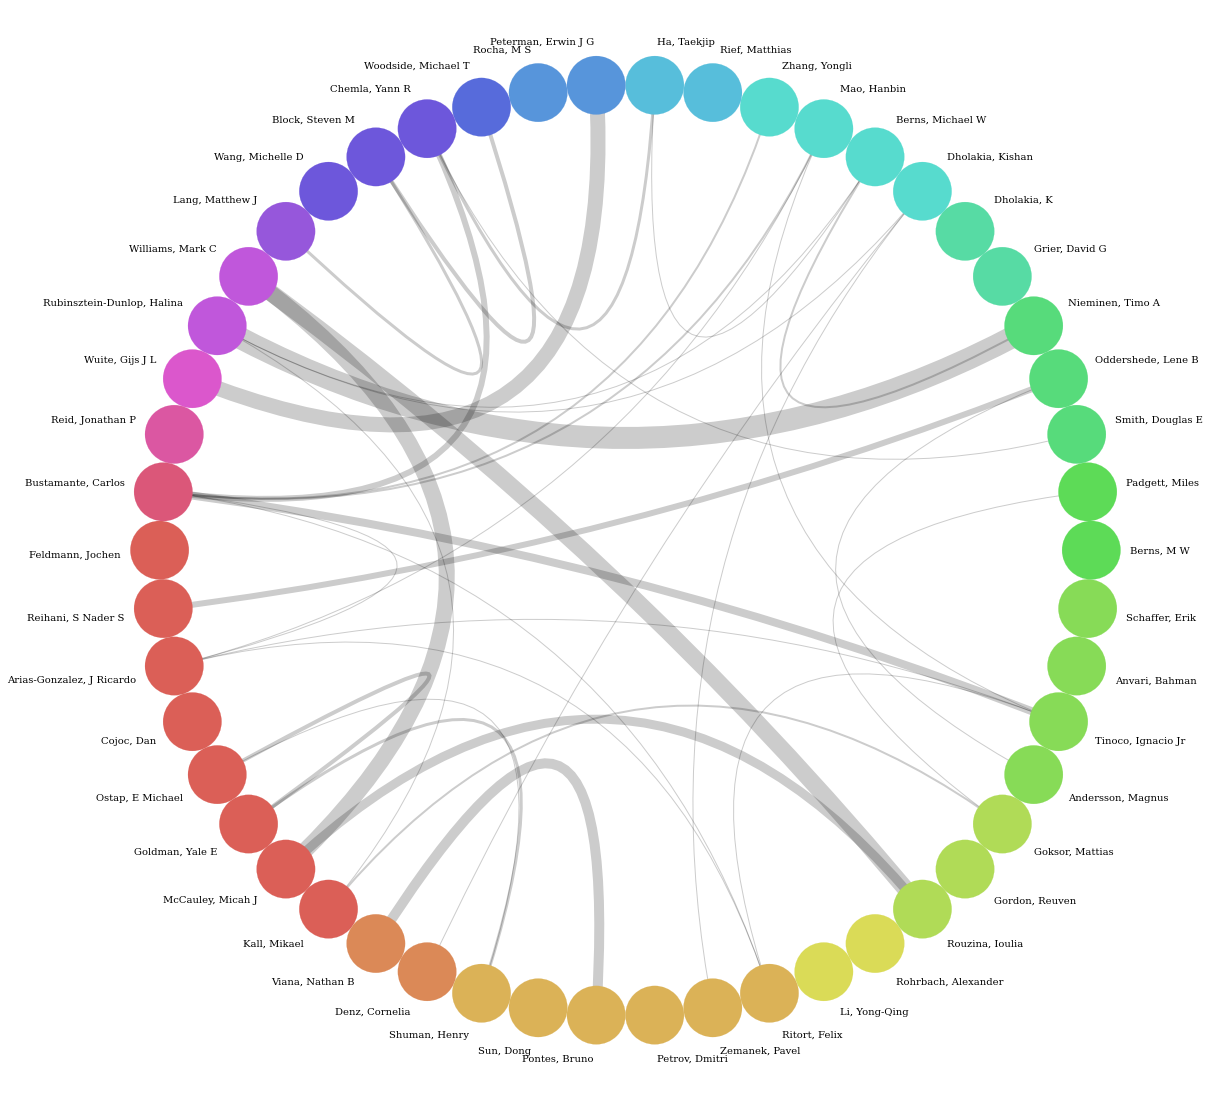

In [48]:
c = nv.CircosPlot(
    G_50,
    dpi=600,
    node_grouping="publications",
    edge_width="Count",
    figsize=(20, 20),
    node_color="publications",
    node_labels=True,
)
c.draw()
plt.show()

But this is a network of co-authoring, not citations. I suppose we could create those as well. But I am not sure we have co-author info like this

# Trying on our data

In [ ]:
import ast

In [5]:
data = pd.read_csv("bb_pulications.csv", index_col=0)

In [6]:
data['author'] = data['bib'].apply(lambda x: ast.literal_eval(x)['author'])
data['author_count'] = data['author'].apply(lambda x: len(x))

In [7]:
data['author_count'].value_counts()

1    809
2    132
3     30
4     17
5      7
Name: author_count, dtype: int64

In [15]:
authors_flat = [
    author
    for authors in list(data["author"].dropna())
    for author in authors
]

## co-author

In [8]:
authors = data["author"].dropna()
author_connections = list(
    map(lambda x: list(combinations(x[::-1], 2)), authors)
)
flat_connections = [item for sublist in author_connections for item in sublist]

In [9]:
# Create a dataframe with the connections
df = pd.DataFrame(flat_connections, columns=["From", "To"])
df_graph = df.groupby(["From", "To"]).size().reset_index()
df_graph.columns = ["From", "To", "Count"]

In [10]:
df_graph

From             To  Count
0     A Appadurai     B Anderson      1
1        A Breton   A Giacometti      1
2        A Breton   A Modigliani      1
3    A DE GESTION     N SPÉCIAUX      1
4    A De Angelis  C Ianniciello      1
..            ...            ...    ...
365    X Tremblay   HP Francfort      1
366        Y Biro      A LaGamma      1
367   Y Luginbühl       T Muxart      1
368   Y Stavridès      B Abescat      1
369         ZM Mo     A Corniche      1

[370 rows x 3 columns]

In [31]:
G = nx.from_pandas_edgelist(
    df_graph, source="From", target="To", edge_attr="Count"
)

# Limit to TOP 50 authors
top50authors = pd.DataFrame.from_records(
    Counter(authors_flat).most_common(100), columns=["Name", "Count"]
)

In [39]:
top50authors.head(20)

Name  Count
0            F Shyllon     16
1              K Siehr      9
2         J Nevadomsky      5
3         JAR Nafziger      5
4            C Renfrew      4
5          D Lowenthal      4
6               L Witz      4
7            C Rassool      4
8            G Minkley      4
9         F Bodenstein      4
10            LV Prott      4
11             B Savoy      4
12            N Brodie      3
13             C Scott      3
14            E Barkan      3
15               Z Liu      3
16             C Stahn      3
17  RE Howard-Hassmann      3
18         RK Paterson      3
19              K Hill      3

In [33]:
top50_nodes = (n for n in list(G.nodes()) if n in list(top50authors["Name"]))

G_50 = G.subgraph(top50_nodes)

for n in G_50.nodes():
    G_50.nodes[n]["publications"] = int(
        top50authors[top50authors["Name"] == n]["Count"]
    )

In [35]:
len(G_50.nodes)

46

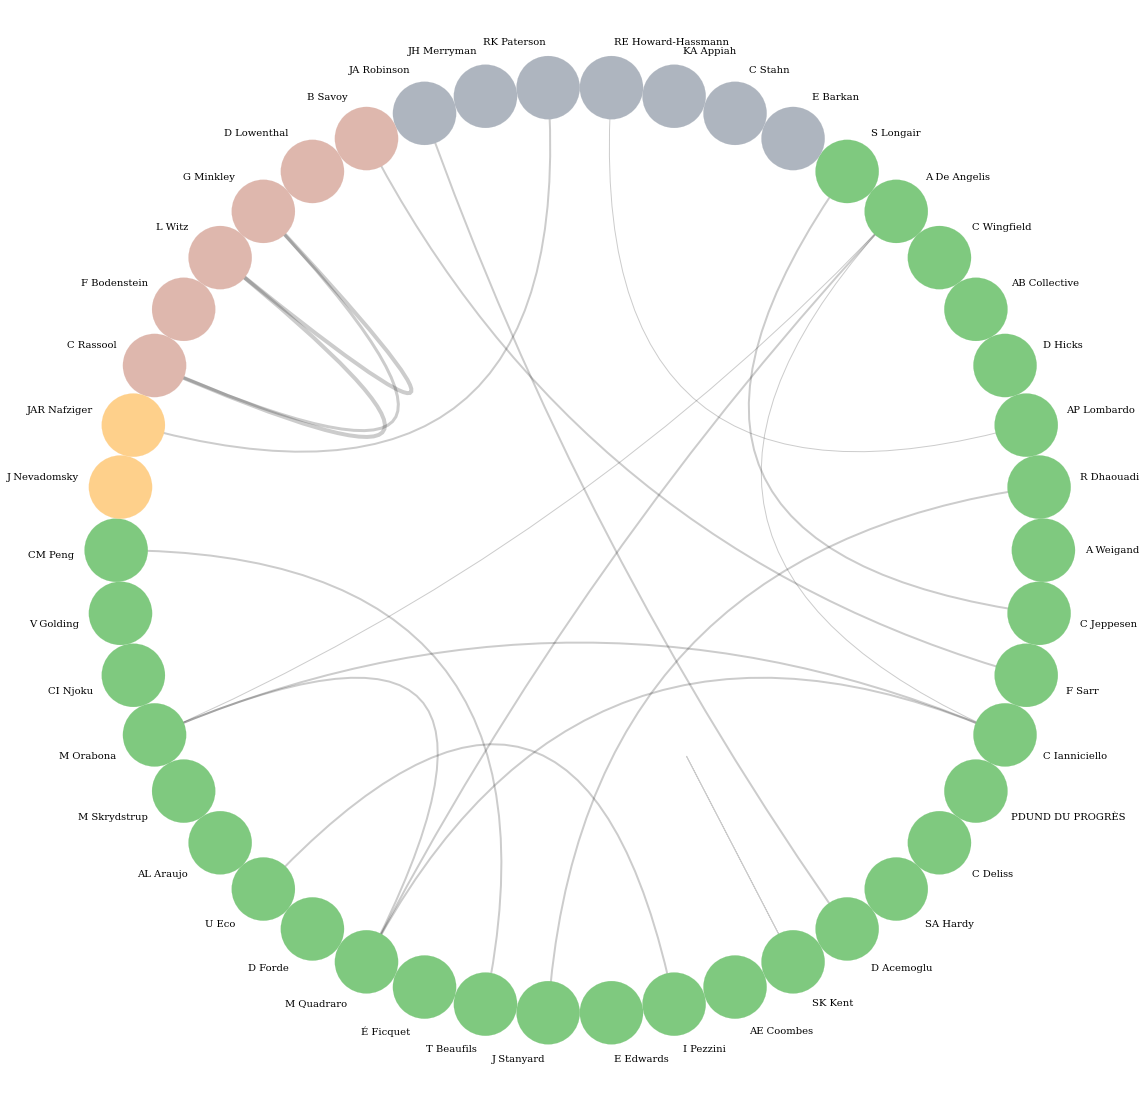

In [34]:
c = nv.CircosPlot(
    G_50,nv
    dpi=600,
    node_grouping="publications",
    edge_width="Count",
    figsize=(20, 20),
    node_color="publications",
    node_labels=True,
)
c.draw()
plt.show()